In [38]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call


In [39]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [41]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [42]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


In [43]:
# Fill NaN for embarked column
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna('S', inplace=True)
B28 = titanic_df[titanic_df['Cabin'] == 'B28']
B28

C:\Users\shazz\AppData\Local\Temp\ipykernel_14760\2703716091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\shazz\AppData\Local\Temp\ipykernel_14760\2703716091.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
61,62,1,1,"Icard, Miss. Amelie",38.0,0,0,113572,80.0,B28,S,True,False
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",62.0,0,0,113572,80.0,B28,S,True,False


Now, we do the same to the "Embarked" column.

In [44]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,False,False,True


In [45]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df.drop("Name", axis=1, inplace=True)
titanic_df.drop("Ticket", axis=1, inplace=True)

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    bool   
 8   Sex_male     891 non-null    bool   
 9   Embarked_C   891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 53.2 KB


In [46]:
# Assign x and y variables
X = titanic_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

In [47]:
# Split data into training, development and testing set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, 
                y, test_size=0.2, random_state=42)

X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, 
                y_train_full, test_size=0.2, random_state=42)

In [48]:
# Train and plot decision tree
# Training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None)
unpruned.fit(X_train, y_train)

DecisionTreeClassifier()

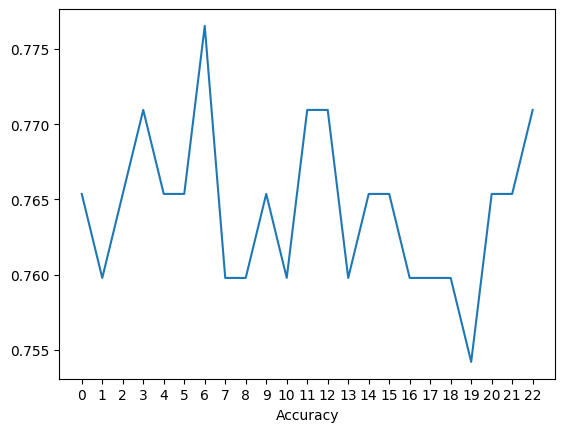

In [49]:
# looking at effect of pruning   
unpruned_depths = range(unpruned.tree_.max_depth)

unpruned_scores = [] 
for d in unpruned_depths:
  clf = DecisionTreeClassifier(max_depth=None)
  clf.fit(X_train, y_train)
  score = clf.score(X_test, y_test)
  unpruned_scores.append(score)

fig, ax = plt.subplots()
ax.plot(unpruned_depths, unpruned_scores)
plt.xlabel("Max_depth values")
plt.xlabel("Accuracy")
ax.xaxis.set_ticks(unpruned_depths)
plt.show()

In [50]:
# fitting the chosen tree
depth = unpruned_depths[np.argmax(unpruned_scores)]
print('Depth of:', depth)

unpruned = DecisionTreeClassifier(max_depth=None)
unpruned.fit(X, y)

Depth of: 6


DecisionTreeClassifier()

In [51]:
export_graphviz(
    clf,
    out_file="titanic_tree.dot",
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    special_characters=True
)

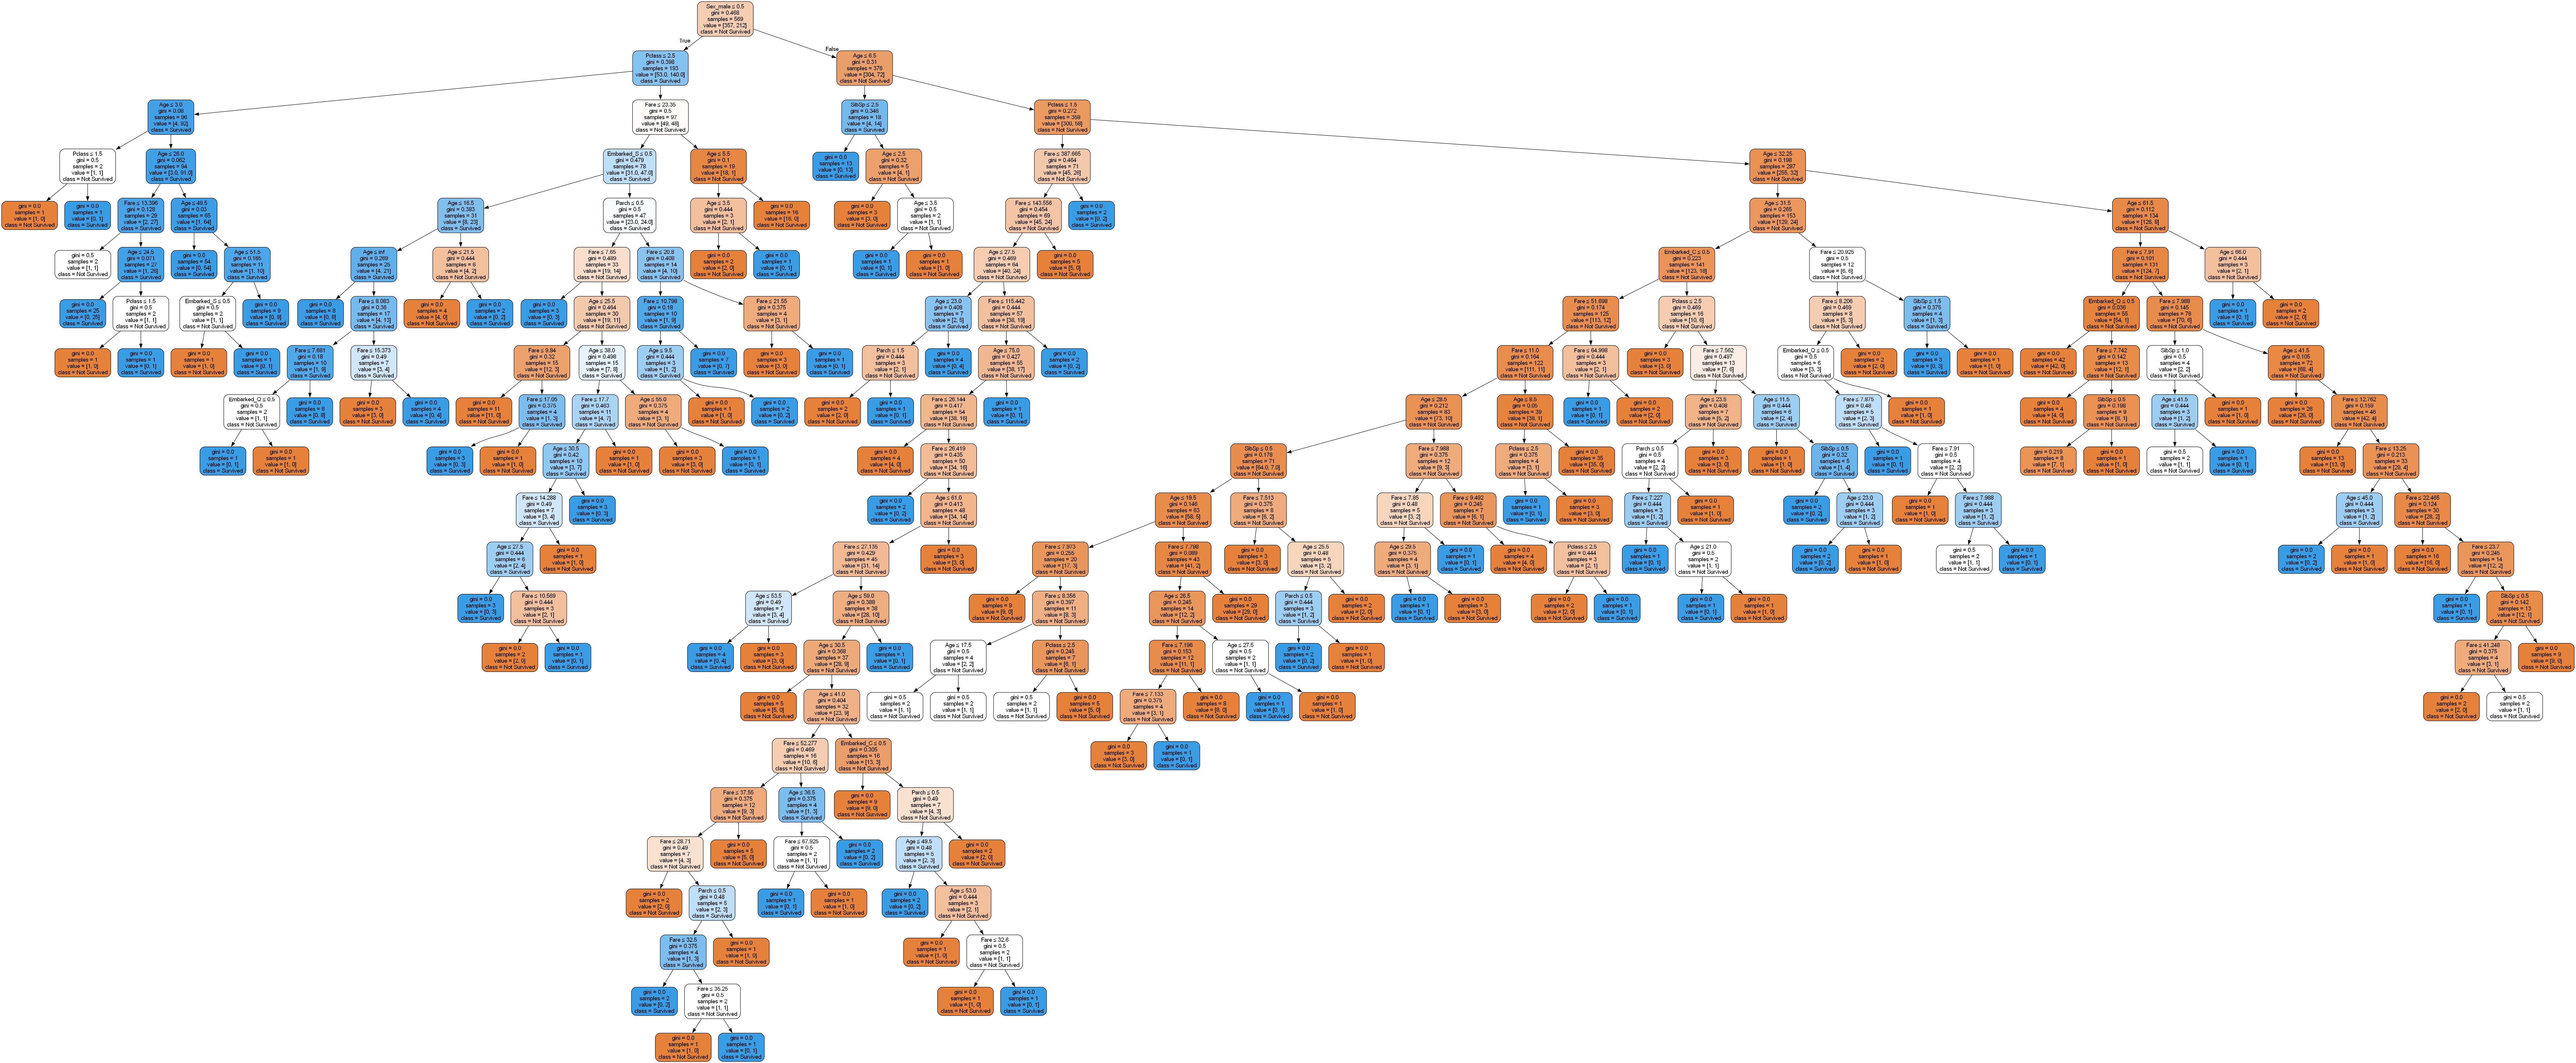

In [52]:
call(['dot', '-Tpng', 'titnic_tree.dot', '-o', 'titanic_tree.png', '-Gdpi=600'])
display(Image(filename='titanic_tree.png', width=400))

In [53]:
# Calculate accuracy on the development set
dev_accuracy = unpruned.score(X_dev, y_dev)
print("Accuracy on the development set:", round(dev_accuracy, 2))
print("At depth:", unpruned.tree_.max_depth)

Accuracy on the development set: 0.97
At depth: 22


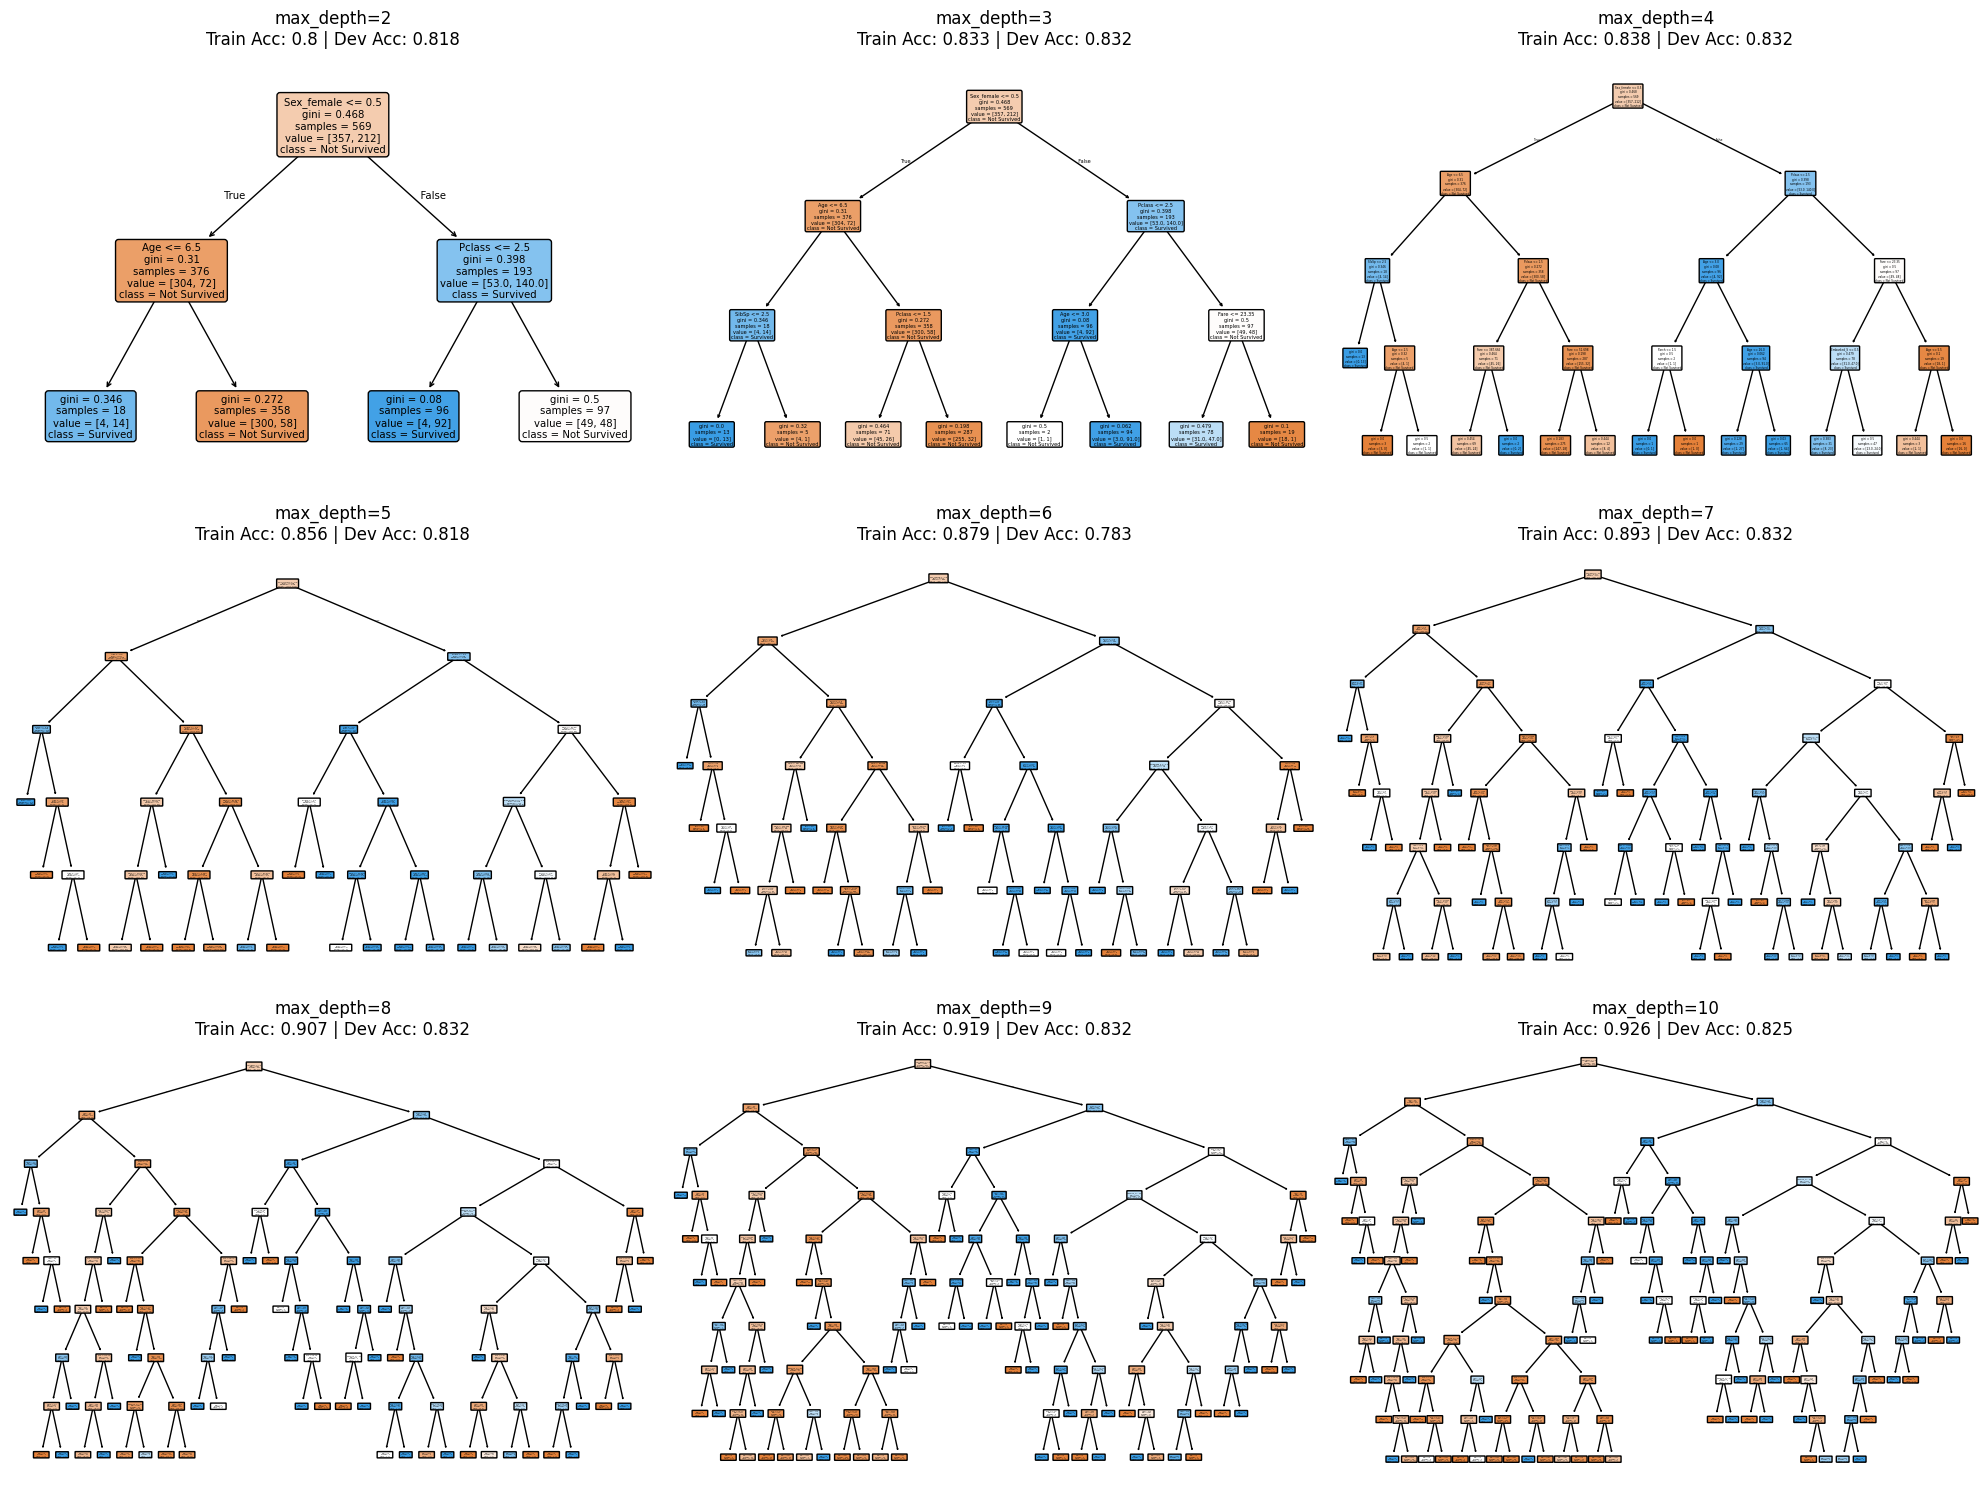

In [54]:
# Set up the figure for plotting multiple decision trees
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

train_accuracies = []
dev_accuracies = []
for depth in range(2, 11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Plot the tree
    ax = axes[depth - 2]
    plot_tree(
        model, 
        feature_names=X.columns,
        class_names=['Not Survived', 'Survived'],
        filled=True, 
        rounded=True, 
        ax=ax
    )
    
    # Calculate accuracies
    dev_accuracy = model.score(X_dev, y_dev)
    dev_accuracies.append(dev_accuracy)
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    ax.set_title(
        f"max_depth={depth}\nTrain Acc: {round(train_accuracy, 3)} | Dev Acc: {round(dev_accuracy, 3)}"
    )

plt.tight_layout()
plt.show()

In [55]:
print("Accuracies:")
for depth, train_acc, dev_acc in zip(range(2, 11), train_accuracies, dev_accuracies):
    print(f"max_depth={depth}:\tTrain Accuracy = {round(train_acc, 3)}, Dev Accuracy = {round(dev_acc, 3)}")

Accuracies:
max_depth=2:	Train Accuracy = 0.8, Dev Accuracy = 0.818
max_depth=3:	Train Accuracy = 0.833, Dev Accuracy = 0.832
max_depth=4:	Train Accuracy = 0.838, Dev Accuracy = 0.832
max_depth=5:	Train Accuracy = 0.856, Dev Accuracy = 0.818
max_depth=6:	Train Accuracy = 0.879, Dev Accuracy = 0.783
max_depth=7:	Train Accuracy = 0.893, Dev Accuracy = 0.832
max_depth=8:	Train Accuracy = 0.907, Dev Accuracy = 0.832
max_depth=9:	Train Accuracy = 0.919, Dev Accuracy = 0.832
max_depth=10:	Train Accuracy = 0.926, Dev Accuracy = 0.825


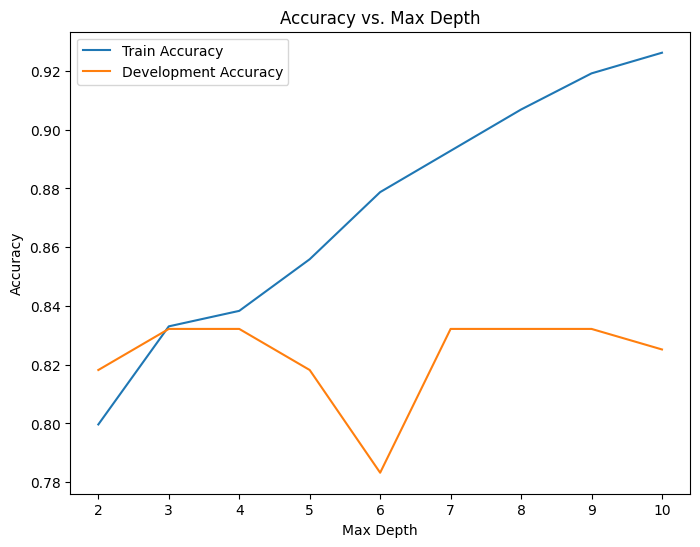

In [56]:
data = {
    "x": list(range(2, 11)),
    "y1": train_accuracies,
    "y2": dev_accuracies
}

accuracy = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.plot(accuracy["x"], accuracy["y1"], label="Train Accuracy")
plt.plot(accuracy["x"], accuracy["y2"], label="Development Accuracy")

# Adding titles and labels
plt.title("Accuracy vs. Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()

Line plot analysis  
The training accuracy line shows an increase the deeper the decision tree, however this is not reflected in the development accuracy.

At max depth 2 the accuracy of both are close. This indicates the model is not overfitting but the training accuracy could be improved.

At max depth 3 the training accuracy increases and is the most similar to the development accuracy. Showing this is probably the best balance.

Max depth 4 has a slightly higher variance. From then the model shows differences between the development accuracy and training accuracy. The training accuracy continues to increase showing the model is learning more patterns in the data, however the difference between this and the development accuracy suggests overfitting.

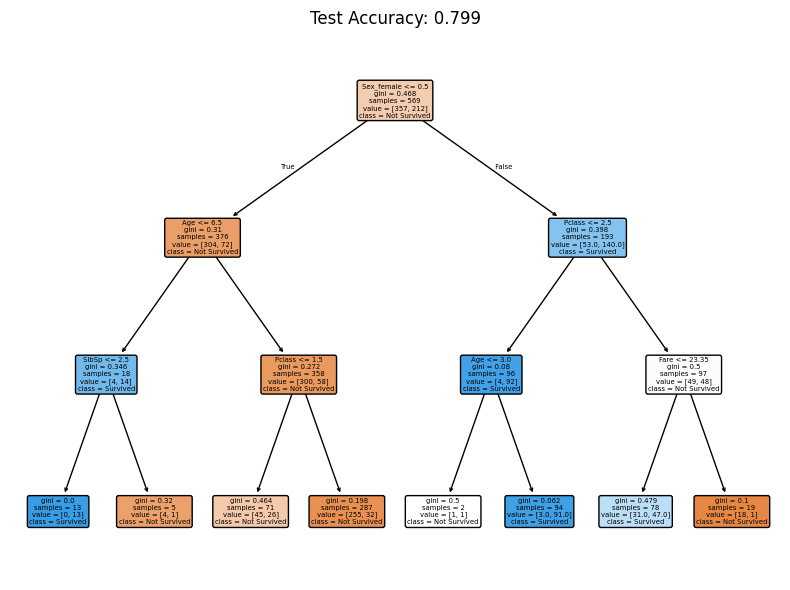

In [57]:
pruned_model = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(
        pruned_model, 
        feature_names=X.columns,
        class_names=['Not Survived', 'Survived'],
        filled=True, 
        rounded=True, 
        ax=ax
    )

# Calculate accuracy
test_accuracy = pruned_model.score(X_test, y_test)


ax.set_title(f"Test Accuracy: {round(test_accuracy, 3)}")

plt.tight_layout()
plt.show()


Test Accuracy: 79.9%

This is slightly lower than the training accuracy at 83.3%, however this is not a significant difference and as training data is 'seen', whereas test data is 'unseen', this does not appear to pose a significant issue.  
Slightly more concerning is the difference between the test accuracy and development accuracy (83.2%), indicating further room for improvement.

Help with Graphviz:  
https://graphviz.readthedocs.io/en/stable/manual.html#

Using zip():  
https://www.geeksforgeeks.org/zip-in-python/
